## Predecir la tasa de promocion efectiva escolar en TdF

## Carga de dataset


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
pip install pandas openpyxl



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

# Especifica el nombre del archivo Excel
arch_A = '../src/data/dataset.xlsx'

# Lee la hoja del archivo Excel empezando desde la fila que contiene los datos
#nombre_hoja = 'Escuelas'
fila_inicio_datos = 0  # Cambia este valor al número de la fila menos 1

# Cargar DataFrame
df1 = pd.read_excel(arch_A, skiprows=fila_inicio_datos)
df1


,Departamento,Sector,Localización,ESTABLECIMIENTO,Matricula,Promovidos,No Promovidos,Total de Egresados,Matrícula.1,Promovidos.1,...,No Promovidos.4,Matrícula.5,Promovidos.5,No Promovidos.5,Matrícula.6,Promovidos.6,No Promovidos.6,Matrícula.7,Promovidos.7,No Promovidos.7
0,RIO GRANDE,Estatal,NaN,DEPENDENCIA PROVINCIAL:,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,940015000.0,COLEGIO PROVINCIAL ANTARTIDA ARGENTINA,704.0,228.0,93.0,63.0,120.0,38.0,...,13.0,118.0,35.0,11.0,98.0,43.0,36.0,NaN,NaN,NaN
2,NaN,NaN,940002500.0,COLEGIO PROVINCIAL COMANDANTE LUIS PIEDRABUENA,843.0,293.0,144.0,71.0,141.0,79.0,...,25.0,138.0,37.0,13.0,139.0,37.0,67.0,NaN,NaN,NaN
3,NaN,NaN,940002600.0,COLEGIO PROVINCIAL SOBERANIA NACIONAL,563.0,208.0,102.0,42.0,99.0,42.0,...,24.0,68.0,42.0,11.0,50.0,20.0,6.0,NaN,NaN,NaN
4,NaN,NaN,940001700.0,COLEGIO PROVINCIAL ALICIA MOREAU DE JUSTO,450.0,186.0,64.0,33.0,77.0,45.0,...,10.0,84.0,22.0,8.0,53.0,17.0,20.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,940014700.0,INSTITUTO SALESIANO DON BOSCO - USHUAIA,345.0,315.0,NaN,61.0,55.0,52.0,...,NaN,54.0,48.0,NaN,61.0,61.0,NaN,NaN,NaN,NaN
161,NaN,NaN,940008700.0,COLEGIO DIOCESANO MONSEÑOR MIGUEL ANGEL ALEMAN,488.0,329.0,10.0,79.0,85.0,76.0,...,1.0,83.0,57.0,NaN,82.0,49.0,8.0,NaN,NaN,NaN
162,NaN,NaN,940006300.0,COLEGIO NACIONAL DE USHUAIA,220.0,112.0,9.0,34.0,33.0,24.0,...,NaN,36.0,15.0,NaN,44.0,17.0,9.0,NaN,NaN,NaN
163,NaN,NaN,940012600.0,C.I.E.U. LIBERTADOR GRAL. SAN MARTIN,265.0,131.0,21.0,22.0,58.0,41.0,...,1.0,43.0,13.0,NaN,38.0,17.0,16.0,NaN,NaN,NaN


In [11]:
# DataFrames df1
print("DataFrame:")
print(df1.head())  # Muestra las primeras filas del primer DataFrame

DataFrame:
  Departamento   Sector  Localización  \
0   RIO GRANDE  Estatal           NaN   
1          NaN      NaN   940015000.0   
2          NaN      NaN   940002500.0   
3          NaN      NaN   940002600.0   
4          NaN      NaN   940001700.0   

                                 ESTABLECIMIENTO   Matricula  Promovidos  \
0                         DEPENDENCIA PROVINCIAL:        NaN         NaN   
1          COLEGIO PROVINCIAL ANTARTIDA ARGENTINA      704.0       228.0   
2  COLEGIO PROVINCIAL COMANDANTE LUIS PIEDRABUENA      843.0       293.0   
3           COLEGIO PROVINCIAL SOBERANIA NACIONAL      563.0       208.0   
4       COLEGIO PROVINCIAL ALICIA MOREAU DE JUSTO      450.0       186.0   

   No Promovidos  Total de Egresados  Matrícula.1  Promovidos.1  ...  \
0            NaN                 NaN          NaN           NaN  ...   
1           93.0                63.0        120.0          38.0  ...   
2          144.0                71.0        141.0          79.0  ... 

In [12]:
# Dataframe 
print(df1.to_string())

    Departamento   Sector  Localización                                                           ESTABLECIMIENTO   Matricula  Promovidos  No Promovidos  Total de Egresados  Matrícula.1  Promovidos.1  No Promovidos.1  Matrícula.2  Promovidos.2  No Promovidos.2  Matrícula.3  Promovidos.3  No Promovidos.3  Matrícula.4  Promovidos.4  No Promovidos.4  Matrícula.5  Promovidos.5  No Promovidos.5  Matrícula.6  Promovidos.6  No Promovidos.6  Matrícula.7  Promovidos.7  No Promovidos.7
0     RIO GRANDE  Estatal           NaN                                                    DEPENDENCIA PROVINCIAL:        NaN         NaN            NaN                 NaN          NaN           NaN              NaN          NaN           NaN              NaN          NaN           NaN              NaN          NaN           NaN              NaN          NaN           NaN              NaN          NaN           NaN              NaN          NaN           NaN              NaN
1            NaN      NaN   940015000.

In [13]:
# Rellenando vacios con 0
df_rellenado = df1.fillna(0)


In [14]:
# Dataframe 
print(df_rellenado.to_string())

    Departamento   Sector  Localización                                                           ESTABLECIMIENTO   Matricula  Promovidos  No Promovidos  Total de Egresados  Matrícula.1  Promovidos.1  No Promovidos.1  Matrícula.2  Promovidos.2  No Promovidos.2  Matrícula.3  Promovidos.3  No Promovidos.3  Matrícula.4  Promovidos.4  No Promovidos.4  Matrícula.5  Promovidos.5  No Promovidos.5  Matrícula.6  Promovidos.6  No Promovidos.6  Matrícula.7  Promovidos.7  No Promovidos.7
0     RIO GRANDE  Estatal           0.0                                                    DEPENDENCIA PROVINCIAL:        0.0         0.0            0.0                 0.0          0.0           0.0              0.0          0.0           0.0              0.0          0.0           0.0              0.0          0.0           0.0              0.0          0.0           0.0              0.0          0.0           0.0              0.0          0.0           0.0              0.0
1              0        0   940015000.

In [15]:
# Dataframe 
print(df_rellenado.head())

  Departamento   Sector  Localización  \
0   RIO GRANDE  Estatal           0.0   
1            0        0   940015000.0   
2            0        0   940002500.0   
3            0        0   940002600.0   
4            0        0   940001700.0   

                                 ESTABLECIMIENTO   Matricula  Promovidos  \
0                         DEPENDENCIA PROVINCIAL:        0.0         0.0   
1          COLEGIO PROVINCIAL ANTARTIDA ARGENTINA      704.0       228.0   
2  COLEGIO PROVINCIAL COMANDANTE LUIS PIEDRABUENA      843.0       293.0   
3           COLEGIO PROVINCIAL SOBERANIA NACIONAL      563.0       208.0   
4       COLEGIO PROVINCIAL ALICIA MOREAU DE JUSTO      450.0       186.0   

   No Promovidos  Total de Egresados  Matrícula.1  Promovidos.1  ...  \
0            0.0                 0.0          0.0           0.0  ...   
1           93.0                63.0        120.0          38.0  ...   
2          144.0                71.0        141.0          79.0  ...   
3       

In [16]:
# Eliminar las columnas Depatamento, Sector y Localizacion
df2 = df_rellenado.drop(columns=['Departamento', 'Sector', 'Localización'])

In [17]:
df2

,ESTABLECIMIENTO,Matricula,Promovidos,No Promovidos,Total de Egresados,Matrícula.1,Promovidos.1,No Promovidos.1,Matrícula.2,Promovidos.2,...,No Promovidos.4,Matrícula.5,Promovidos.5,No Promovidos.5,Matrícula.6,Promovidos.6,No Promovidos.6,Matrícula.7,Promovidos.7,No Promovidos.7
0,DEPENDENCIA PROVINCIAL:,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,COLEGIO PROVINCIAL ANTARTIDA ARGENTINA,704.0,228.0,93.0,63.0,120.0,38.0,8.0,125.0,40.0,...,13.0,118.0,35.0,11.0,98.0,43.0,36.0,0.0,0.0,0.0
2,COLEGIO PROVINCIAL COMANDANTE LUIS PIEDRABUENA,843.0,293.0,144.0,71.0,141.0,79.0,5.0,142.0,58.0,...,25.0,138.0,37.0,13.0,139.0,37.0,67.0,0.0,0.0,0.0
3,COLEGIO PROVINCIAL SOBERANIA NACIONAL,563.0,208.0,102.0,42.0,99.0,42.0,8.0,124.0,39.0,...,24.0,68.0,42.0,11.0,50.0,20.0,6.0,0.0,0.0,0.0
4,COLEGIO PROVINCIAL ALICIA MOREAU DE JUSTO,450.0,186.0,64.0,33.0,77.0,45.0,6.0,82.0,47.0,...,10.0,84.0,22.0,8.0,53.0,17.0,20.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,INSTITUTO SALESIANO DON BOSCO - USHUAIA,345.0,315.0,0.0,61.0,55.0,52.0,0.0,60.0,49.0,...,0.0,54.0,48.0,0.0,61.0,61.0,0.0,0.0,0.0,0.0
161,COLEGIO DIOCESANO MONSEÑOR MIGUEL ANGEL ALEMAN,488.0,329.0,10.0,79.0,85.0,76.0,0.0,85.0,61.0,...,1.0,83.0,57.0,0.0,82.0,49.0,8.0,0.0,0.0,0.0
162,COLEGIO NACIONAL DE USHUAIA,220.0,112.0,9.0,34.0,33.0,24.0,0.0,27.0,14.0,...,0.0,36.0,15.0,0.0,44.0,17.0,9.0,0.0,0.0,0.0
163,C.I.E.U. LIBERTADOR GRAL. SAN MARTIN,265.0,131.0,21.0,22.0,58.0,41.0,2.0,42.0,21.0,...,1.0,43.0,13.0,0.0,38.0,17.0,16.0,0.0,0.0,0.0


In [19]:
print("Columnas del DataFrame original:")
print(df2.columns.tolist())
print(df2.head())

Columnas del DataFrame original:
['ESTABLECIMIENTO ', 'Matricula', 'Promovidos', 'No Promovidos', 'Total de Egresados', 'Matrícula.1', 'Promovidos.1', 'No Promovidos.1', 'Matrícula.2', 'Promovidos.2', 'No Promovidos.2', 'Matrícula.3', 'Promovidos.3', 'No Promovidos.3', 'Matrícula.4', 'Promovidos.4', 'No Promovidos.4', 'Matrícula.5', 'Promovidos.5', 'No Promovidos.5', 'Matrícula.6', 'Promovidos.6', 'No Promovidos.6', 'Matrícula.7', 'Promovidos.7', 'No Promovidos.7']
                                 ESTABLECIMIENTO   Matricula  Promovidos  \
0                         DEPENDENCIA PROVINCIAL:        0.0         0.0   
1          COLEGIO PROVINCIAL ANTARTIDA ARGENTINA      704.0       228.0   
2  COLEGIO PROVINCIAL COMANDANTE LUIS PIEDRABUENA      843.0       293.0   
3           COLEGIO PROVINCIAL SOBERANIA NACIONAL      563.0       208.0   
4       COLEGIO PROVINCIAL ALICIA MOREAU DE JUSTO      450.0       186.0   

   No Promovidos  Total de Egresados  Matrícula.1  Promovidos.1  \
0     

In [20]:
print(df2.head())

                                 ESTABLECIMIENTO   Matricula  Promovidos  \
0                         DEPENDENCIA PROVINCIAL:        0.0         0.0   
1          COLEGIO PROVINCIAL ANTARTIDA ARGENTINA      704.0       228.0   
2  COLEGIO PROVINCIAL COMANDANTE LUIS PIEDRABUENA      843.0       293.0   
3           COLEGIO PROVINCIAL SOBERANIA NACIONAL      563.0       208.0   
4       COLEGIO PROVINCIAL ALICIA MOREAU DE JUSTO      450.0       186.0   

   No Promovidos  Total de Egresados  Matrícula.1  Promovidos.1  \
0            0.0                 0.0          0.0           0.0   
1           93.0                63.0        120.0          38.0   
2          144.0                71.0        141.0          79.0   
3          102.0                42.0         99.0          42.0   
4           64.0                33.0         77.0          45.0   

   No Promovidos.1  Matrícula.2  Promovidos.2  ...  No Promovidos.4  \
0              0.0          0.0           0.0  ...              0.0  

In [22]:
# Eliminar columnas innecesarias para tener los datos de los totales de alumnos en sus categorias
columnas_a_eliminar = ['ESTABLECIMIENTO ', 'Matrícula.1', 'Promovidos.1', 'No Promovidos.1',
                       'Matrícula.2', 'Promovidos.2', 'No Promovidos.2', 
                       'Matrícula.3', 'Promovidos.3', 'No Promovidos.3',
                       'Matrícula.4', 'Promovidos.4', 'No Promovidos.4',
                       'Matrícula.5', 'Promovidos.5', 'No Promovidos.5',
                       'Matrícula.6', 'Promovidos.6', 'No Promovidos.6',
                       'Matrícula.7', 'Promovidos.7', 'No Promovidos.7',]
df3 = df2.drop(columns=columnas_a_eliminar)

# Manejo de valores nulos (aquí simplemente los eliminamos)
df3_nonull = df3.dropna()

df3_nonull


,Matricula,Promovidos,No Promovidos,Total de Egresados
0,0.0,0.0,0.0,0.0
1,704.0,228.0,93.0,63.0
2,843.0,293.0,144.0,71.0
3,563.0,208.0,102.0,42.0
4,450.0,186.0,64.0,33.0
...,...,...,...,...
160,345.0,315.0,0.0,61.0
161,488.0,329.0,10.0,79.0
162,220.0,112.0,9.0,34.0
163,265.0,131.0,21.0,22.0


In [23]:
# Descripción de los totales del DataFrame
print(df3_nonull.describe())

         Matricula   Promovidos  No Promovidos  Total de Egresados
count   165.000000   165.000000     165.000000          165.000000
mean    321.660606   117.624242      30.006061           29.206061
std     313.950798   143.875257      43.630166           28.607414
min       0.000000     0.000000       0.000000            0.000000
25%      16.000000     4.000000       0.000000            0.000000
50%     262.000000    80.000000       9.000000           25.000000
75%     522.000000   180.000000      47.000000           47.000000
max    1265.000000  1132.000000     198.000000          111.000000


**Análisis Descriptivo de los Datos**

### Matricula
- **Conteo (count)**: 165
- **Promedio (mean)**: 321.66
- **Desviación Estándar (std)**: 313.95
- **Mínimo (min)**: 0
- **Percentil 25 (25%)**: 16
- **Mediana (50%)**: 262
- **Percentil 75 (75%)**: 522
- **Máximo (max)**: 1265

El número promedio de estudiantes matriculados es de aproximadamente 322, con una amplia dispersión alrededor de este valor, como lo indica la desviación estándar de 313.95. La mediana es 262, lo que significa que la mitad de los establecimientos tienen menos de 262 estudiantes matriculados. La matrícula varía significativamente entre los establecimientos, con algunos teniendo hasta 1265 estudiantes.

### Promovidos
- **Conteo (count)**: 165
- **Promedio (mean)**: 117.62
- **Desviación Estándar (std)**: 143.88
- **Mínimo (min)**: 0
- **Percentil 25 (25%)**: 4
- **Mediana (50%)**: 80
- **Percentil 75 (75%)**: 180
- **Máximo (max)**: 1132

El promedio de estudiantes promovidos es de aproximadamente 118. La desviación estándar es alta (143.88), indicando que hay una gran variabilidad en las tasas de promoción entre los establecimientos. La mediana de 80 promovidos sugiere que la mitad de los establecimientos tienen menos de 80 estudiantes promovidos, mientras que el percentil 75 muestra que un cuarto de los establecimientos tiene 180 o más promovidos.

### No Promovidos
- **Conteo (count)**: 165
- **Promedio (mean)**: 30.01
- **Desviación Estándar (std)**: 43.63
- **Mínimo (min)**: 0
- **Percentil 25 (25%)**: 0
- **Mediana (50%)**: 9
- **Percentil 75 (75%)**: 47
- **Máximo (max)**: 198

El número promedio de estudiantes no promovidos es de 30, con una desviación estándar de 43.63, lo que indica una alta variabilidad en las tasas de repetición. La mediana es de 9, lo que sugiere que la mitad de los establecimientos tienen menos de 9 estudiantes no promovidos. Sin embargo, algunos establecimientos tienen hasta 198 estudiantes no promovidos.

### Total de Egresados
- **Conteo (count)**: 165
- **Promedio (mean)**: 29.21
- **Desviación Estándar (std)**: 28.61
- **Mínimo (min)**: 0
- **Percentil 25 (25%)**: 0
- **Mediana (50%)**: 25
- **Percentil 75 (75%)**: 47
- **Máximo (max)**: 111

El promedio de egresados es de aproximadamente 29.21. La desviación estándar es de 28.61, lo que refleja variabilidad en el número de egresados por establecimiento. La mediana es de 25, indicando que la mitad de los establecimientos tienen 25 o menos egresados. El percentil 75 muestra que un cuarto de los establecimientos tienen 47 o más egresados, y el máximo es 111.

### Conclusión
Los datos muestran una considerable variabilidad entre los establecimientos en términos de matrícula, promoción, no promoción y egreso. Esta dispersión se verifica por la diferencias en el tamaño de las escuelas, la calidad de la educación, los recursos disponibles, entre otros factores.

### Analiso el dataset con valores a utilizar en el modelo de regresion lineal

In [24]:
# Eliminar columnas innecesarias para tener los datos de los totales de alumnos en sus categorias
columnas_a_eliminar = ['ESTABLECIMIENTO ', 'Matricula', 'Promovidos', 'No Promovidos', 'Total de Egresados']
df_rl = df2.drop(columns=columnas_a_eliminar)

# Manejo de valores nulos (aquí simplemente los eliminamos)
ds = df_rl.dropna()

ds

,Matrícula.1,Promovidos.1,No Promovidos.1,Matrícula.2,Promovidos.2,No Promovidos.2,Matrícula.3,Promovidos.3,No Promovidos.3,Matrícula.4,...,No Promovidos.4,Matrícula.5,Promovidos.5,No Promovidos.5,Matrícula.6,Promovidos.6,No Promovidos.6,Matrícula.7,Promovidos.7,No Promovidos.7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120.0,38.0,8.0,125.0,40.0,11.0,119.0,38.0,14.0,124.0,...,13.0,118.0,35.0,11.0,98.0,43.0,36.0,0.0,0.0,0.0
2,141.0,79.0,5.0,142.0,58.0,17.0,141.0,38.0,17.0,142.0,...,25.0,138.0,37.0,13.0,139.0,37.0,67.0,0.0,0.0,0.0
3,99.0,42.0,8.0,124.0,39.0,31.0,115.0,29.0,22.0,107.0,...,24.0,68.0,42.0,11.0,50.0,20.0,6.0,0.0,0.0,0.0
4,77.0,45.0,6.0,82.0,47.0,8.0,81.0,35.0,12.0,73.0,...,10.0,84.0,22.0,8.0,53.0,17.0,20.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,55.0,52.0,0.0,60.0,49.0,0.0,59.0,58.0,0.0,56.0,...,0.0,54.0,48.0,0.0,61.0,61.0,0.0,0.0,0.0,0.0
161,85.0,76.0,0.0,85.0,61.0,0.0,81.0,52.0,1.0,72.0,...,1.0,83.0,57.0,0.0,82.0,49.0,8.0,0.0,0.0,0.0
162,33.0,24.0,0.0,27.0,14.0,0.0,43.0,23.0,0.0,37.0,...,0.0,36.0,15.0,0.0,44.0,17.0,9.0,0.0,0.0,0.0
163,58.0,41.0,2.0,42.0,21.0,0.0,42.0,20.0,2.0,42.0,...,1.0,43.0,13.0,0.0,38.0,17.0,16.0,0.0,0.0,0.0


In [25]:
# Descripción básica del DataFrame
print(ds.describe())

       Matrícula.1  Promovidos.1  No Promovidos.1  Matrícula.2  Promovidos.2  \
count   165.000000    165.000000       165.000000   165.000000    165.000000   
mean     55.218182     24.806061         1.581818    57.412121     21.533333   
std      52.944872     29.885533         3.756414    56.430184     27.899544   
min       0.000000      0.000000         0.000000     0.000000      0.000000   
25%       6.000000      0.000000         0.000000     5.000000      0.000000   
50%      41.000000     14.000000         0.000000    42.000000     13.000000   
75%      92.000000     42.000000         0.000000    95.000000     34.000000   
max     209.000000    207.000000        18.000000   221.000000    219.000000   

       No Promovidos.2  Matrícula.3  Promovidos.3  No Promovidos.3  \
count       165.000000   165.000000    165.000000       165.000000   
mean          3.745455    56.436364     18.387879         3.436364   
std           8.378729    55.267232     23.247236         7.126292   

In [65]:
print(ds['Promovidos.1'].describe())

count    165.000000
mean      24.806061
std       29.885533
min        0.000000
25%        0.000000
50%       14.000000
75%       42.000000
max      207.000000
Name: Promovidos.1, dtype: float64


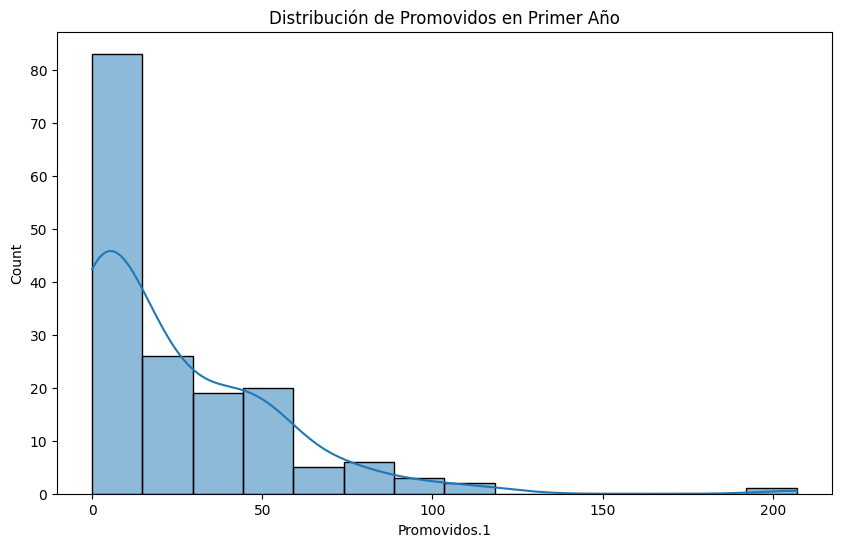

In [26]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.1'], kde=True)
plt.title('Distribución de Promovidos en Primer Año')
plt.show()

In [66]:
print(ds['Promovidos.2'].describe())

count    165.000000
mean      21.533333
std       27.899544
min        0.000000
25%        0.000000
50%       13.000000
75%       34.000000
max      219.000000
Name: Promovidos.2, dtype: float64


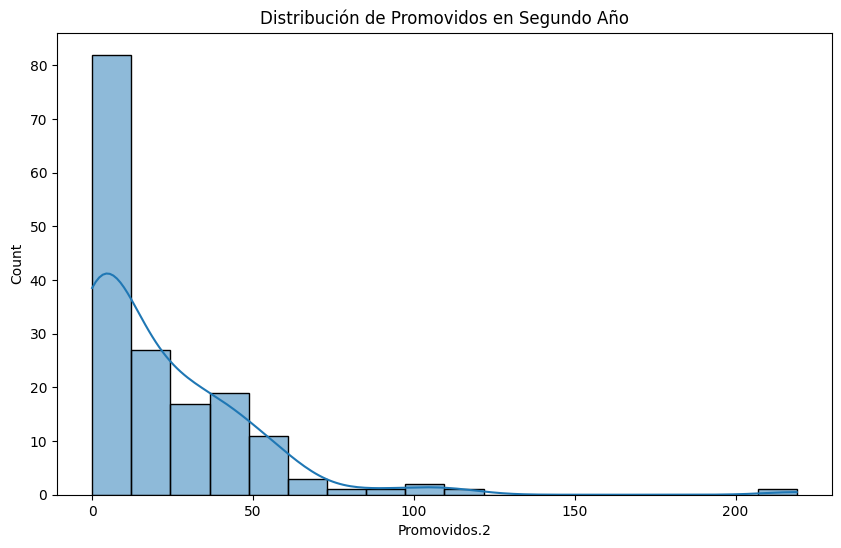

In [27]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.2'], kde=True)
plt.title('Distribución de Promovidos en Segundo Año')
plt.show()

In [67]:
print(ds['Promovidos.3'].describe())

count    165.000000
mean      18.387879
std       23.247236
min        0.000000
25%        0.000000
50%       12.000000
75%       29.000000
max      176.000000
Name: Promovidos.3, dtype: float64


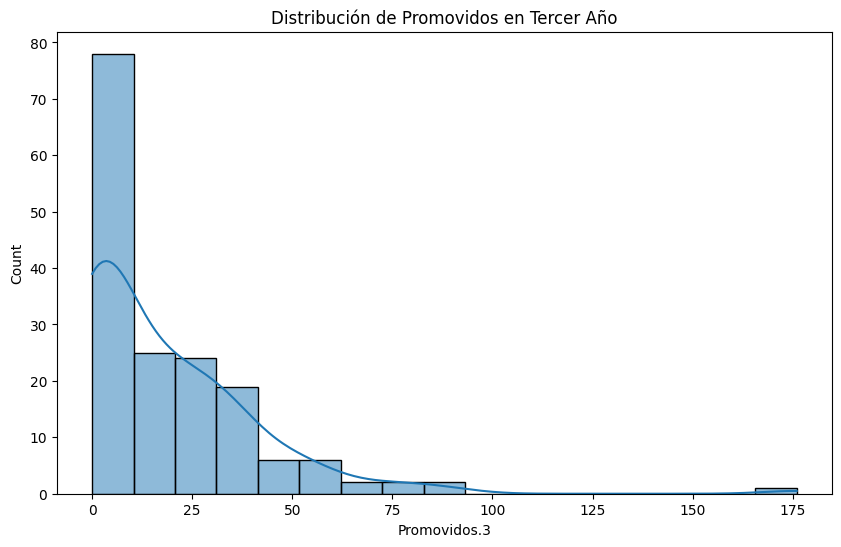

In [28]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.3'], kde=True)
plt.title('Distribución de Promovidos en Tercer Año')
plt.show()

In [68]:
print(ds['Promovidos.4'].describe())

count    165.000000
mean      17.133333
std       21.129835
min        0.000000
25%        0.000000
50%       12.000000
75%       27.000000
max      161.000000
Name: Promovidos.4, dtype: float64


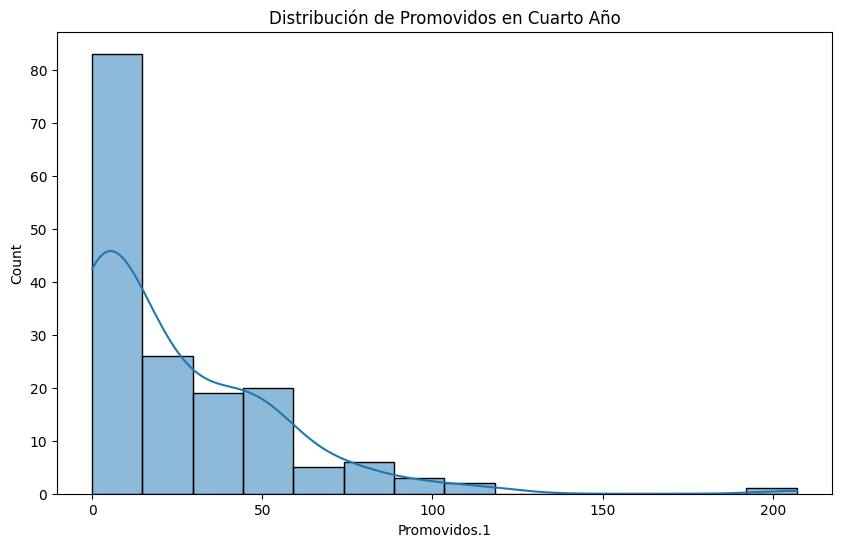

In [29]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.1'], kde=True)
plt.title('Distribución de Promovidos en Cuarto Año')
plt.show()

In [69]:
print(ds['Promovidos.5'].describe())

count    165.000000
mean      15.769697
std       20.535996
min        0.000000
25%        0.000000
50%       10.000000
75%       25.000000
max      169.000000
Name: Promovidos.5, dtype: float64


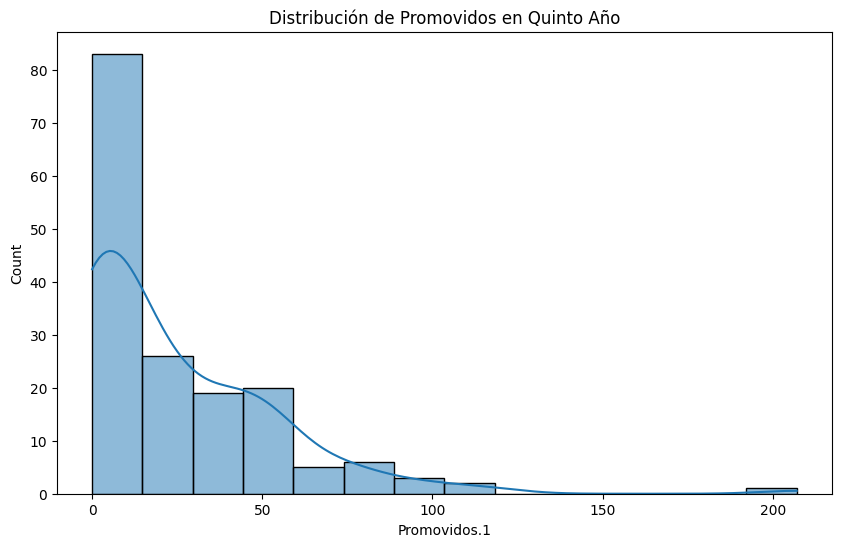

In [30]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.1'], kde=True)
plt.title('Distribución de Promovidos en Quinto Año')
plt.show()

In [70]:
print(ds['Promovidos.6'].describe())

count    165.000000
mean      17.993939
std       21.742534
min        0.000000
25%        0.000000
50%       14.000000
75%       27.000000
max      144.000000
Name: Promovidos.6, dtype: float64


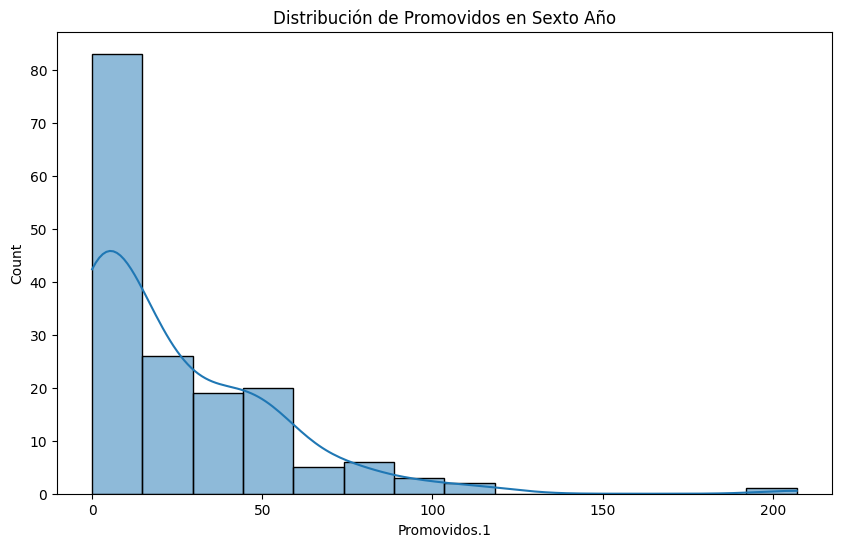

In [31]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.1'], kde=True)
plt.title('Distribución de Promovidos en Sexto Año')
plt.show()

In [71]:
print(ds['Promovidos.7'].describe())

count    165.000000
mean       2.000000
std        8.648981
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       62.000000
Name: Promovidos.7, dtype: float64


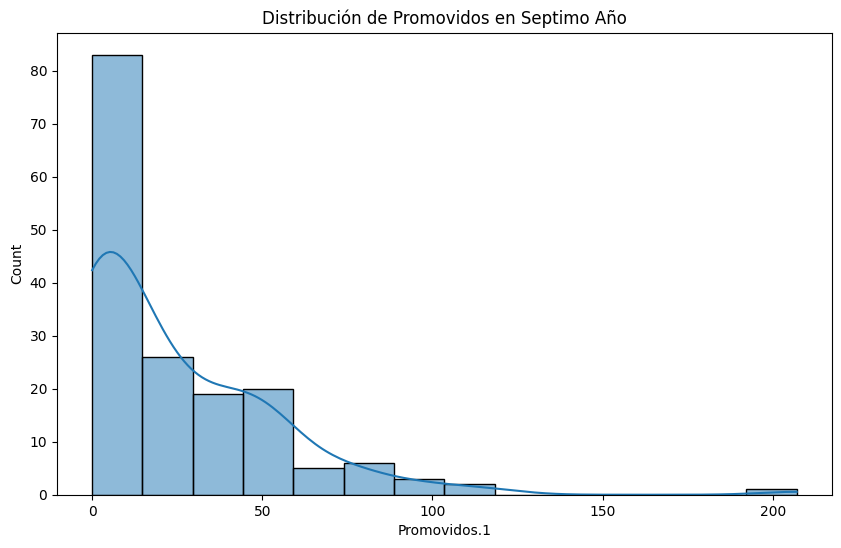

In [32]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(ds['Promovidos.1'], kde=True)
plt.title('Distribución de Promovidos en Septimo Año')
plt.show()

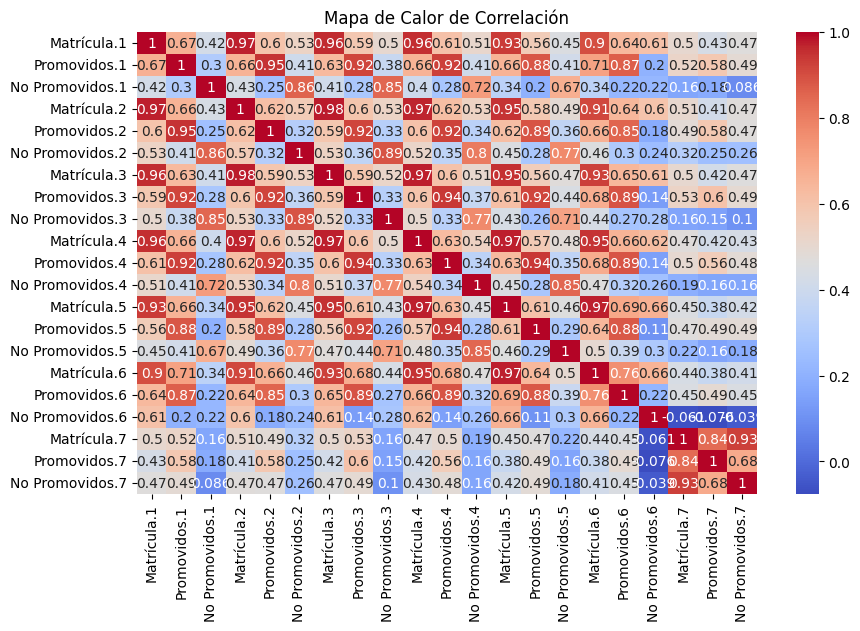

In [33]:
# Correlación entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(ds.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [72]:
# Correlación de Pearson
print("Correlaciones de Pearson:")
print(ds.corr())


Correlaciones de Pearson:
                 Matrícula.1  Promovidos.1  No Promovidos.1  Matrícula.2  \
Matrícula.1         1.000000      0.667732         0.422085     0.974706   
Promovidos.1        0.667732      1.000000         0.303330     0.656284   
No Promovidos.1     0.422085      0.303330         1.000000     0.433652   
Matrícula.2         0.974706      0.656284         0.433652     1.000000   
Promovidos.2        0.599395      0.947668         0.253311     0.615794   
No Promovidos.2     0.532275      0.405295         0.857742     0.568539   
Matrícula.3         0.961970      0.634103         0.411017     0.978454   
Promovidos.3        0.586392      0.918987         0.284521     0.596337   
No Promovidos.3     0.502095      0.381388         0.849196     0.532540   
Matrícula.4         0.955249      0.657097         0.402325     0.966691   
Promovidos.4        0.607045      0.924742         0.275039     0.619850   
No Promovidos.4     0.510988      0.410824         0.723959   

In [73]:
ds

,Matrícula.1,Promovidos.1,No Promovidos.1,Matrícula.2,Promovidos.2,No Promovidos.2,Matrícula.3,Promovidos.3,No Promovidos.3,Matrícula.4,...,No Promovidos.4,Matrícula.5,Promovidos.5,No Promovidos.5,Matrícula.6,Promovidos.6,No Promovidos.6,Matrícula.7,Promovidos.7,No Promovidos.7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,120.0,38.0,8.0,125.0,40.0,11.0,119.0,38.0,14.0,124.0,...,13.0,118.0,35.0,11.0,98.0,43.0,36.0,0.0,0.0,0.0
2,141.0,79.0,5.0,142.0,58.0,17.0,141.0,38.0,17.0,142.0,...,25.0,138.0,37.0,13.0,139.0,37.0,67.0,0.0,0.0,0.0
3,99.0,42.0,8.0,124.0,39.0,31.0,115.0,29.0,22.0,107.0,...,24.0,68.0,42.0,11.0,50.0,20.0,6.0,0.0,0.0,0.0
4,77.0,45.0,6.0,82.0,47.0,8.0,81.0,35.0,12.0,73.0,...,10.0,84.0,22.0,8.0,53.0,17.0,20.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,55.0,52.0,0.0,60.0,49.0,0.0,59.0,58.0,0.0,56.0,...,0.0,54.0,48.0,0.0,61.0,61.0,0.0,0.0,0.0,0.0
161,85.0,76.0,0.0,85.0,61.0,0.0,81.0,52.0,1.0,72.0,...,1.0,83.0,57.0,0.0,82.0,49.0,8.0,0.0,0.0,0.0
162,33.0,24.0,0.0,27.0,14.0,0.0,43.0,23.0,0.0,37.0,...,0.0,36.0,15.0,0.0,44.0,17.0,9.0,0.0,0.0,0.0
163,58.0,41.0,2.0,42.0,21.0,0.0,42.0,20.0,2.0,42.0,...,1.0,43.0,13.0,0.0,38.0,17.0,16.0,0.0,0.0,0.0


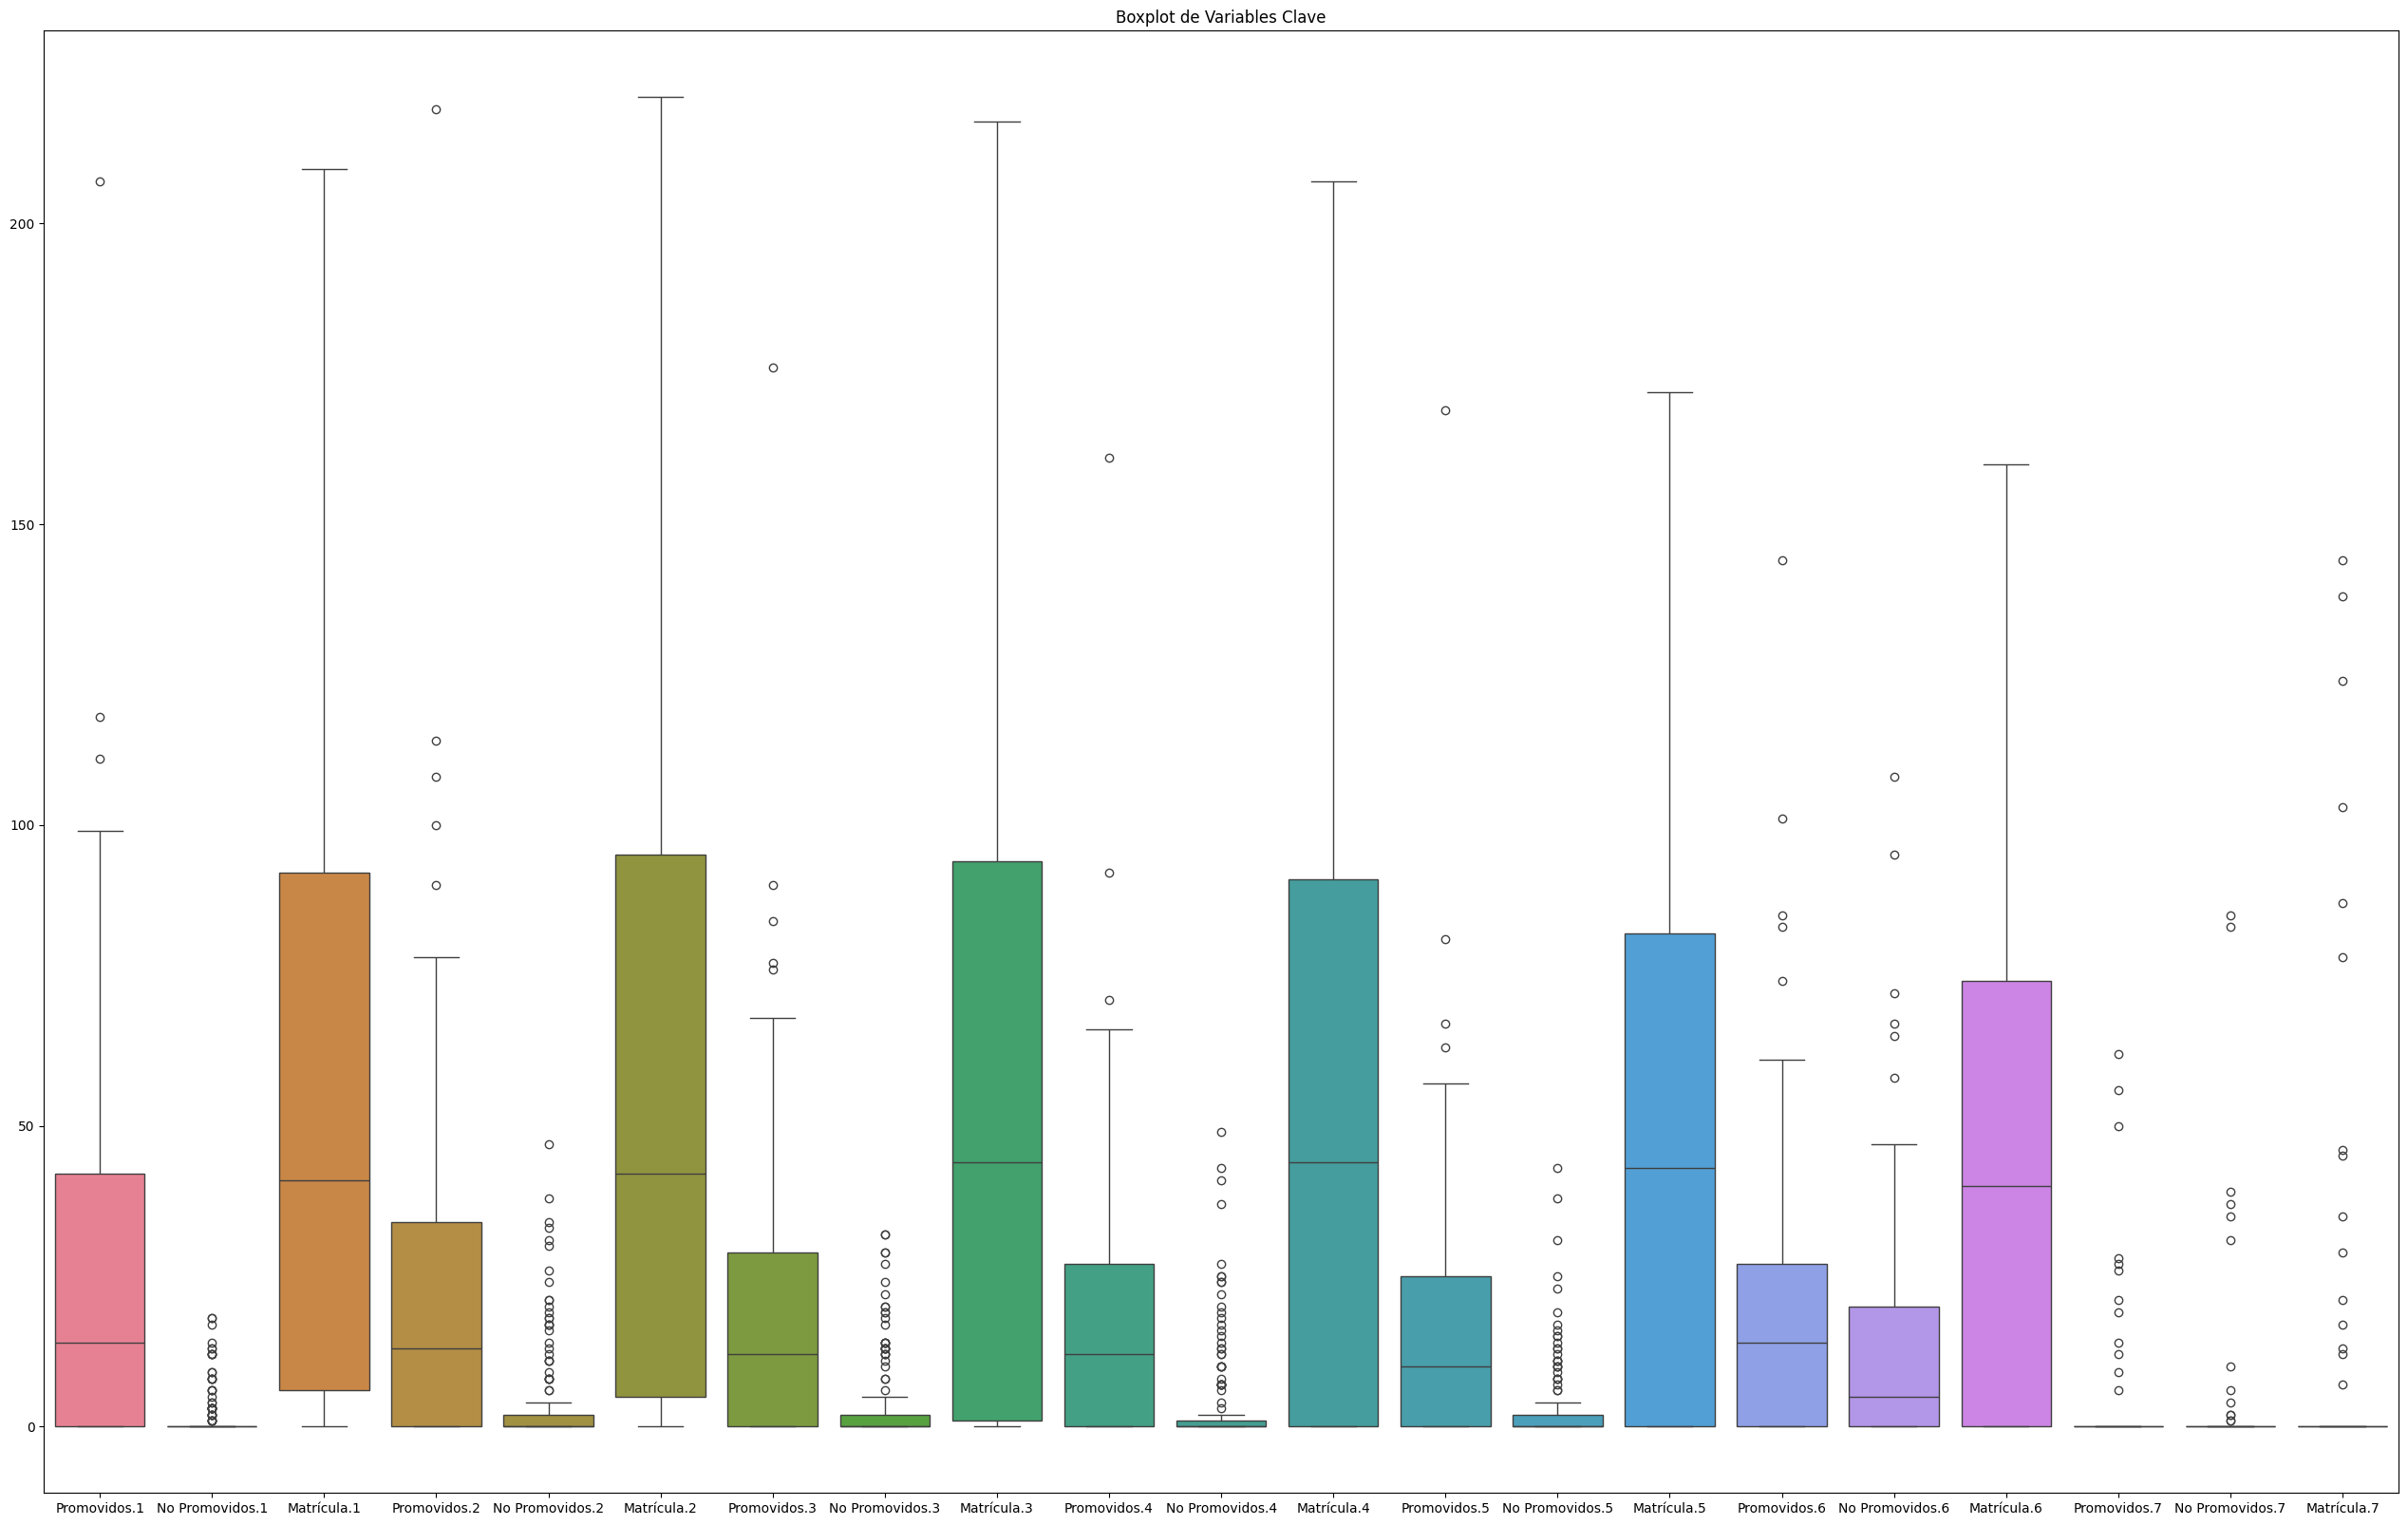

In [75]:
# Boxplot para identificar outliers
plt.figure(figsize=(32, 20))
sns.boxplot(data=ds[['Promovidos.1', 'No Promovidos.1', 'Matrícula.1',
                     'Promovidos.2', 'No Promovidos.2', 'Matrícula.2',
                     'Promovidos.3', 'No Promovidos.3', 'Matrícula.3',
                     'Promovidos.4', 'No Promovidos.4', 'Matrícula.4',
                     'Promovidos.5', 'No Promovidos.5', 'Matrícula.5',
                     'Promovidos.6', 'No Promovidos.6', 'Matrícula.6',
                     'Promovidos.7', 'No Promovidos.7', 'Matrícula.7',
                     ]])
plt.title('Boxplot de Variables Clave')
plt.show()


### Calculo el modelo para primer año

In [37]:
# Características y variable objetivo
X = ds[['Matrícula.1', 'No Promovidos.1']]  
y = ds['Promovidos.1']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)


In [39]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)


Error Cuadrático Medio (MSE): 483.9207003647555
Coeficiente de Determinación (R2): 0.46200183893098723
Coeficientes del modelo: [0.37408332 0.08825143]
Intercepto del modelo: 3.5188462068265203


## Analisis de los resultados

#Error Cuadrático Medio (MSE): 483.9207003647555
#Coeficiente de Determinación (R2): 0.46200183893098723
#Coeficientes del modelo: [0.37408332 0.08825143]
#Intercepto del modelo: 3.5188462068265203
# Error Cuadrático Medio (MSE): Este valor (7215.13 en tu caso) representa la media de los errores cuadráticos 
# cometidos por el modelo al predecir los valores observados. Cuanto menor sea el MSE, mejor será la calidad de las 
# predicciones del modelo.

# Coeficiente de Determinación (R²): Es una medida que indica la proporción de la variación en la variable dependiente que es predecible a partir de las variables independientes en el modelo. Un valor de R² cercano a 1 indica que el modelo explica bien la variabilidad de los datos observados. En este caso, el valor es 0.3929, lo que sugiere que el modelo explica aproximadamente el 39.29% de la variabilidad de los datos de salida.

# Coeficientes del Modelo: Estos coeficientes ([ 0.18546396, -0.26305664, 2.53690179]) indican cómo cada variable independiente contribuye a las predicciones del modelo. En el contexto educativo, estos coeficientes pueden interpretarse como las características escolares que tienen en las tasas de promoción, repetición o deserción escolar.

# Intercepto del Modelo: Es el valor predicho de la variable dependiente cuando todas las variables independientes son cero. En este caso, el intercepto es -4.9978, lo que puede interpretarse como el valor esperado de la variable dependiente cuando todas las variables independientes no tienen efecto.

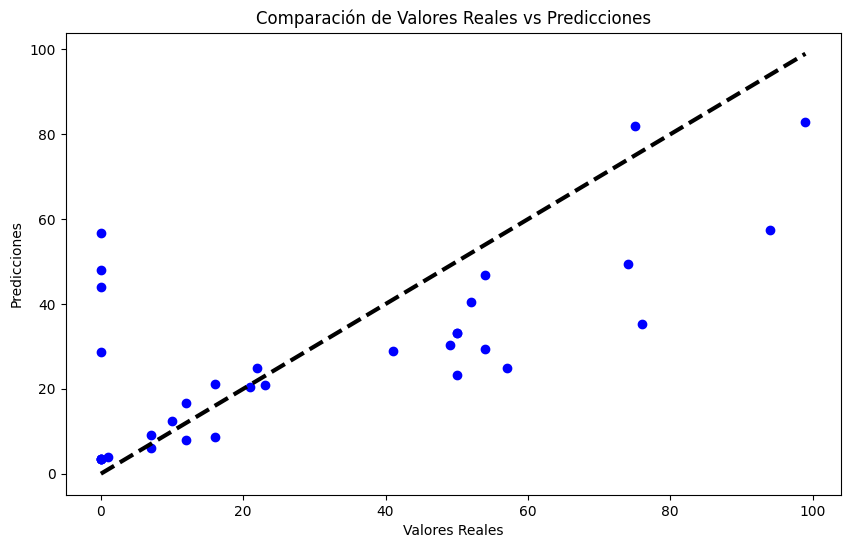

In [40]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [77]:
# Características y variable objetivo
X = ds[['Matrícula.1', 'No Promovidos.1']]  
y = ds['Promovidos.1']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Crear el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [79]:
# Realizar predicciones en el conjunto de prueba
y_pred = tree_model.predict(X_test)


In [80]:
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R²):", r2)


Error Cuadrático Medio (MSE): 1509.4280388923246
Coeficiente de Determinación (R²): -0.6781045088130744


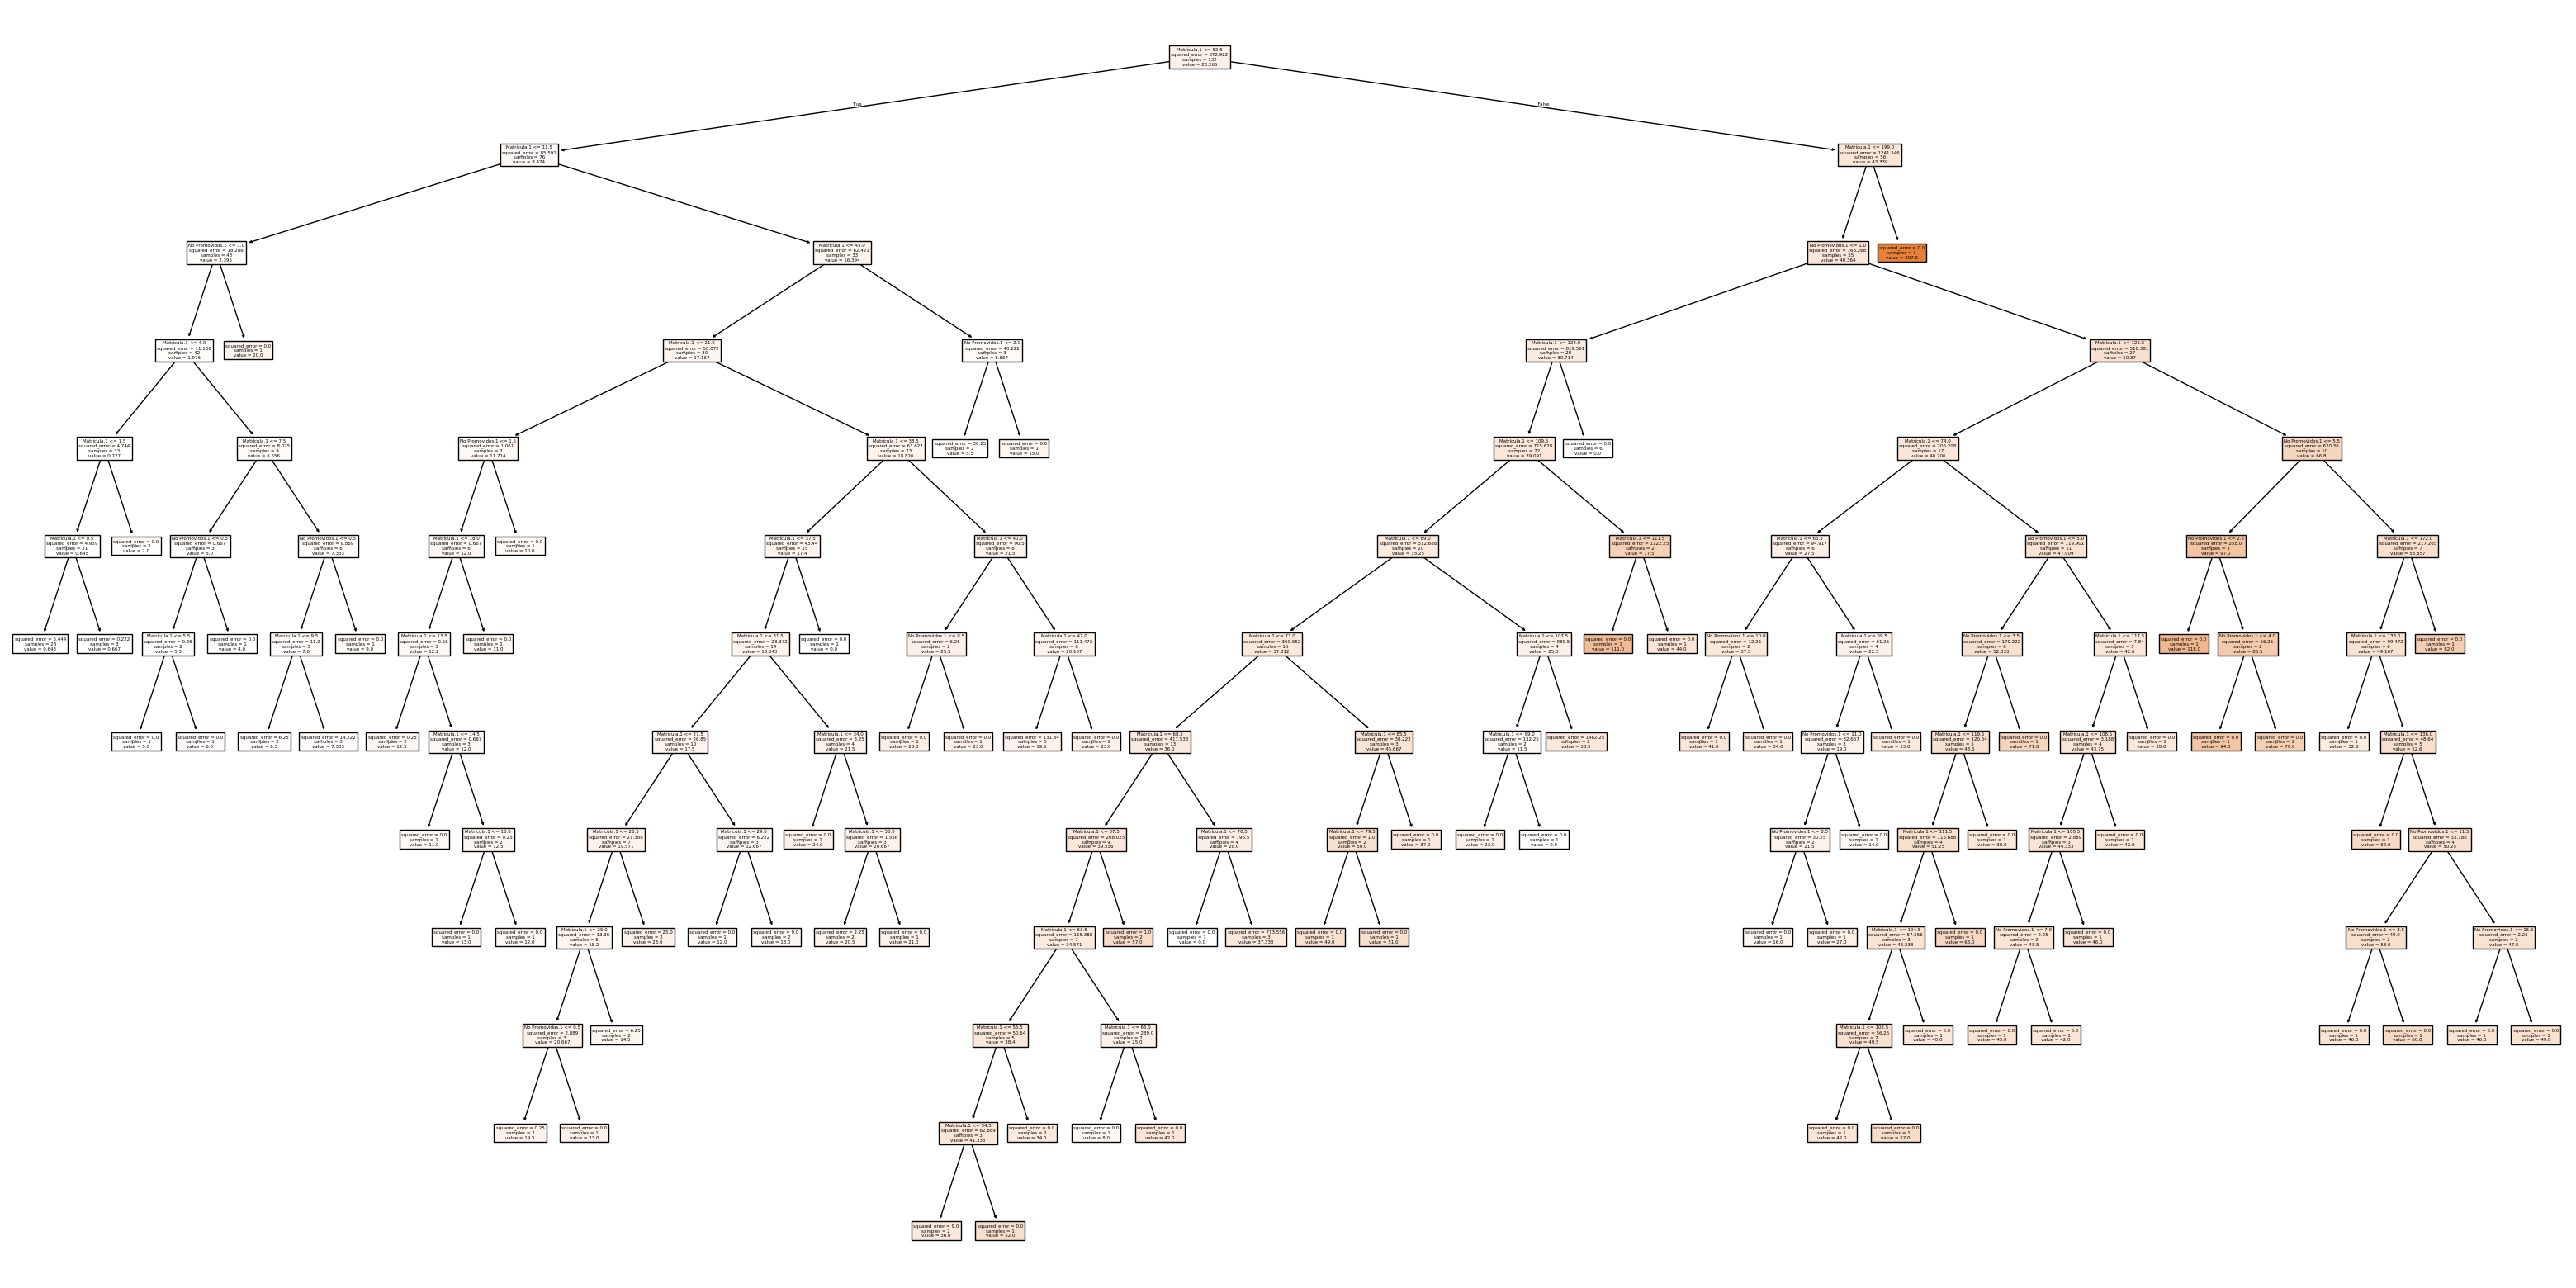

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(40,20))
plot_tree(tree_model, feature_names=['Matrícula.1', 'No Promovidos.1'], filled=True)
plt.show()


### Comparación con la Regresión Lineal
#### Comparando estos resultados con los del modelo de regresión lineal:

### Regresión Lineal:
### MSE: 483.92
### R²: 0.462
### Árbol de Decisión:
### MSE: 1509.428
### R²: -0.678
## La regresión lineal tiene un MSE mucho menor y un R² positivo, lo que indica un mejor rendimiento en términos de ## error de predicción y capacidad para explicar la variabilidad de los datos.


### Analisis del segundo año

In [42]:
# Características y variable objetivo
X = ds[['Matrícula.2', 'No Promovidos.2']]  
y = ds['Promovidos.2']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)


In [45]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)

Error Cuadrático Medio (MSE): 541.6404284104025
Coeficiente de Determinación (R2): 0.14075175166369247
Coeficientes del modelo: [ 0.35474766 -0.25750746]
Intercepto del modelo: 1.9967654771352805


## analisis para el segundo año

## Error Cuadrático Medio (MSE): 541.64 = El MSE de 541.64 indica que, en promedio, la diferencia al cuadrado entre los valores observados y los valores predichos es de 541.64. 

## Coeficiente de Determinación (R²): 0.1408 = Un R² de 0.1408 indica que el modelo explica aproximadamente el 14.08% de la variabilidad en la variable dependiente. 

## Coeficientes del Modelo: [0.35474766, -0.25750746] = Coeficiente 1 (0.35474766): Por cada unidad de incremento en Matrícula.2, el valor predicho de Promovidos.2 aumenta en aproximadamente 0.355, manteniendo constante la otra variable.
## Coeficiente 2 (-0.25750746): Por cada unidad de incremento en No Promovidos.2, el valor predicho de Promovidos.2 disminuye en aproximadamente 0.258, manteniendo constante la otra variable.

## Intercepto del Modelo: 1.9967654771352805 = El intercepto de aproximadamente 1.997 sugiere que cuando todas las variables independientes son cero, el valor predicho de Promovidos.1 es 1.997.

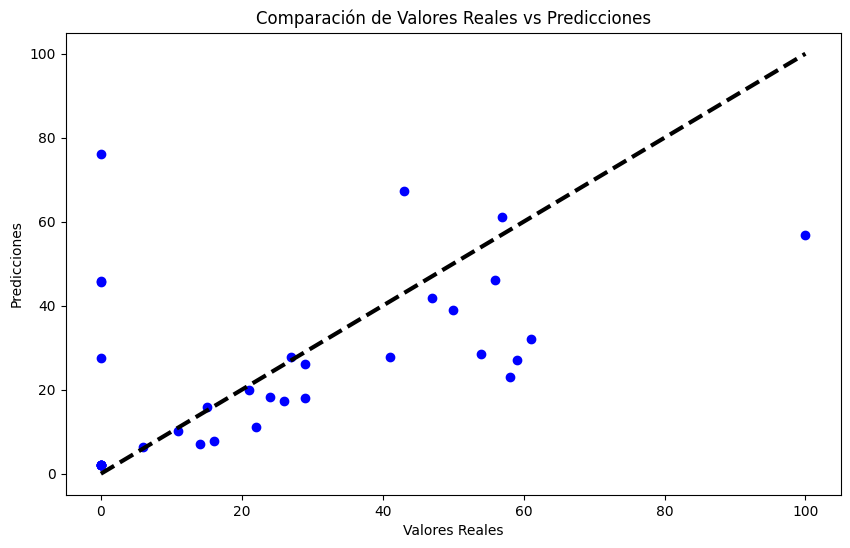

In [46]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

# Analisis del tercer año

In [47]:
# Características y variable objetivo
X = ds[['Matrícula.3', 'No Promovidos.3']]  
y = ds['Promovidos.3']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

In [49]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)

Error Cuadrático Medio (MSE): 372.85932712132177
Coeficiente de Determinación (R2): 0.303285517048584
Coeficientes del modelo: [ 0.26658373 -0.05807921]
Intercepto del modelo: 3.390028432717834


## Analisis para el tercer año

## Error Cuadrático Medio (MSE): 372.86 = El MSE de 372.86 indica que, en promedio, la diferencia al cuadrado entre los valores observados y los valores predichos es de 372.86. Este valor es menor que el MSE de modelos anteriores, lo que sugiere que este modelo tiene un error de predicción relativamente más bajo y, por lo tanto, un mejor ajuste a los datos.

## Coeficiente de Determinación (R²): 0.3033 = Un R² de 0.3033 indica que el modelo explica aproximadamente el 30.33% de la variabilidad en la variable dependiente. Sugiere que el modelo es moderadamente efectivo en la predicción de la variable dependiente.

## Coeficientes del Modelo: [0.26658373, -0.05807921] = Coeficiente 1 (0.26658373): Por cada unidad de incremento en Matrícula.3, el valor predicho de Promovidos.3 aumenta en aproximadamente 0.267, manteniendo constante la otra variable.
## Coeficiente 2 (-0.05807921): Por cada unidad de incremento en No Promovidos.3, el valor predicho de Promovidos.3 disminuye en aproximadamente 0.058, manteniendo constante la otra variable.
## Estos coeficientes indican que Matrícula.3 tiene un impacto positivo más fuerte en la predicción de Promovidos.3 en comparación con el impacto negativo de No Promovidos.3.

## Intercepto del Modelo: 3.390028432717834 = El intercepto de aproximadamente 3.39 sugiere que cuando todas las variables independientes son cero, el valor predicho de Promovidos.1 es 3.39.

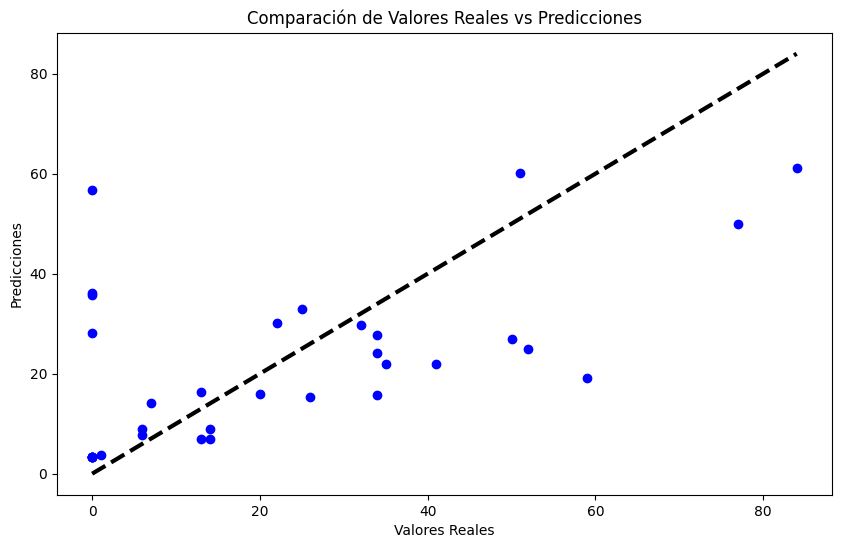

In [50]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

# Analisis del cuarto año

In [51]:
# Características y variable objetivo
X = ds[['Matrícula.4', 'No Promovidos.4']]  
y = ds['Promovidos.4']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)



Error Cuadrático Medio (MSE): 225.80508743622738
Coeficiente de Determinación (R2): 0.37397405226591884
Coeficientes del modelo: [ 0.25870336 -0.00121305]
Intercepto del modelo: 2.6624042341414516


## Analisis para el cuarto año

## Error Cuadrático Medio (MSE): 225.81 = El MSE de 225.81 indica que, en promedio, la diferencia al cuadrado entre los valores observados y los valores predichos es de 225.81. Este modelo tiene un error de predicción relativamente bajo y un mejor ajuste a los datos.

## Coeficiente de Determinación (R²): 0.3740 = Un R² de 0.3740 indica que el modelo explica aproximadamente el 37.40% de la variabilidad en la variable dependiente. Esto representa una mejora con respecto a los modelos anteriores.

## Coeficientes del Modelo: [0.25870336, -0.00121305] = Coeficiente 1 (0.25870336): Por cada unidad de incremento en Matrícula.4, el valor predicho de Promovidos.4 aumenta en aproximadamente 0.259, manteniendo constante la otra variable.
## Coeficiente 2 (-0.00121305): Por cada unidad de incremento en No Promovidos.4, el valor predicho de Promovidos.4 disminuye en aproximadamente 0.001, manteniendo constante la otra variable. Estos coeficientes indican que Matrícula.4 tiene un impacto positivo moderado en la predicción de Promovidos.4, mientras que No Promovidos.4 tiene un impacto negativo muy pequeño.

## Intercepto del Modelo: 2.6624042341414516 = El intercepto de aproximadamente 2.66 sugiere que cuando todas las variables independientes son cero, el valor predicho de Promovidos.4 es 2.66.


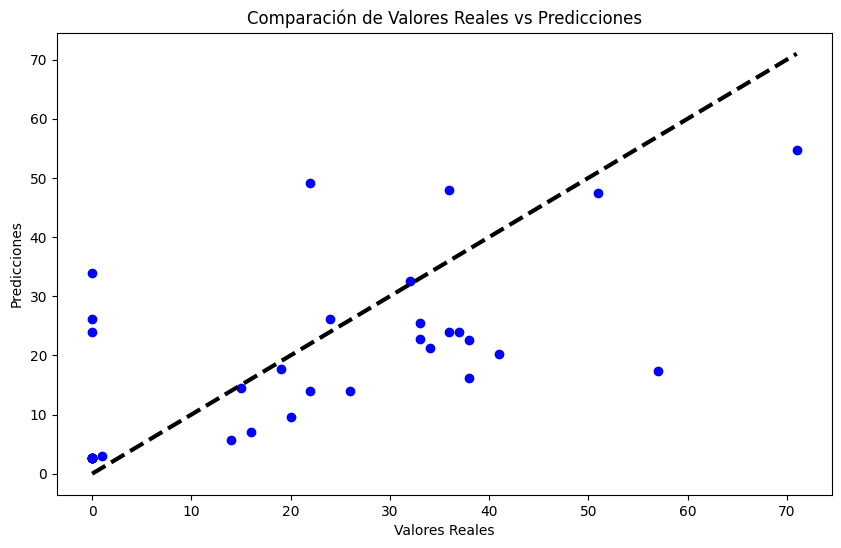

In [52]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

# analisis para el quinto año

In [54]:
# Características y variable objetivo
X = ds[['Matrícula.5', 'No Promovidos.5']]  
y = ds['Promovidos.5']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)

Error Cuadrático Medio (MSE): 276.8697976093152
Coeficiente de Determinación (R2): 0.2789952470538085
Coeficientes del modelo: [0.26773537 0.0444221 ]
Intercepto del modelo: 1.8331216300238289


# Analisis de resultados para el quinto año

## Error Cuadrático Medio (MSE): 276.87 = El MSE de 276.87 indica que, en promedio, la diferencia al cuadrado entre los valores observados y los valores predichos es de 276.87. Este valor es mayor que el MSE del modelo anterior (225.81), lo que sugiere que este modelo tiene un error de predicción relativamente más alto y, por lo tanto, un ajuste menos preciso a los datos.

## Coeficiente de Determinación (R²): 0.2790 = Un R² de 0.2790 indica que el modelo explica aproximadamente el 27.90% de la variabilidad en la variable dependiente. 

## Coeficientes del Modelo: [0.26773537, 0.0444221] = Coeficiente 1 (0.26773537): Por cada unidad de incremento en Matrícula.1, el valor predicho de Promovidos.5 aumenta en aproximadamente 0.268, manteniendo constante la otra variable.
## Coeficiente 2 (0.0444221): Por cada unidad de incremento en No Promovidos.5, el valor predicho de Promovidos.5 aumenta en aproximadamente 0.044, manteniendo constante la otra variable. Estos coeficientes indican que tanto Matrícula.5 como No Promovidos.5 tienen impactos positivos en la predicción de Promovidos.5, con Matrícula.5 teniendo un efecto más significativo.

## Intercepto del Modelo: 1.8331216300238289 = El intercepto de aproximadamente 1.83 sugiere que cuando todas las variables independientes son cero, el valor predicho de Promovidos.5 es 1.83.

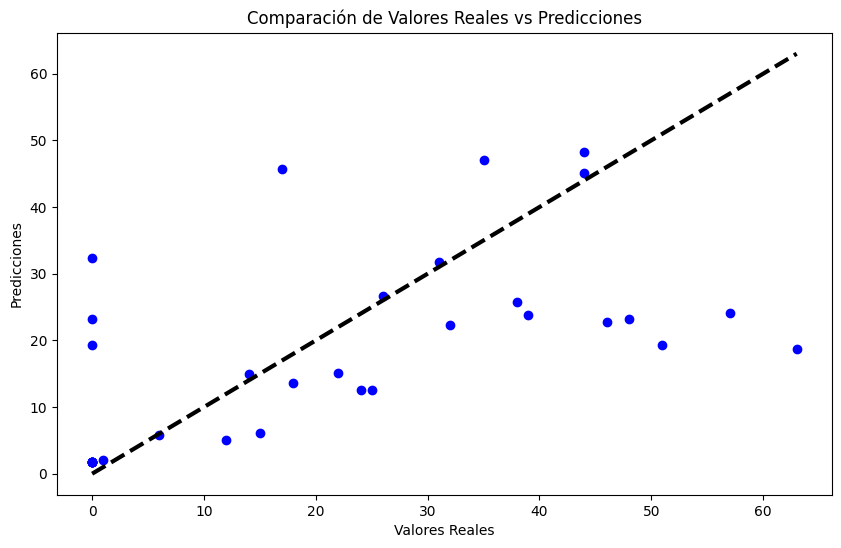

In [55]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

# analisis para el sexto año

In [57]:
# Características y variable objetivo
X = ds[['Matrícula.6', 'No Promovidos.6']]  
y = ds['Promovidos.6']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)

Error Cuadrático Medio (MSE): 227.83216047897906
Coeficiente de Determinación (R2): 0.5345828607522027
Coeficientes del modelo: [ 0.61519562 -0.69859441]
Intercepto del modelo: 0.06094928488962026


# Analisis de resultados el sexto año

## Error Cuadrático Medio (MSE): 227.83 = El MSE de 227.83 indica que, en promedio, la diferencia al cuadrado entre los valores observados y los valores predichos es de 227.83. 

## Coeficiente de Determinación (R²): 0.5346 = Un R² de 0.5346 indica que el modelo explica aproximadamente el 53.46% de la variabilidad en la variable dependiente. 

## Coeficientes del Modelo: [0.61519562, -0.69859441] = Coeficiente 1 (0.61519562): Por cada unidad de incremento en Matrícula.1, el valor predicho de Promovidos.6 aumenta en aproximadamente 0.615, manteniendo constante la otra variable.
## Coeficiente 2 (-0.69859441): Por cada unidad de incremento en No Promovidos.6, el valor predicho de Promovidos.6 disminuye en aproximadamente 0.699, manteniendo constante la otra variable. Estos coeficientes indican que Matrícula.6 tiene un impacto positivo significativo en la predicción de Promovidos.6, mientras que No Promovidos.6 tiene un impacto negativo fuerte.

## Intercepto del Modelo: 0.06094928488962026 = El intercepto de aproximadamente 0.06 sugiere que cuando todas las variables independientes son cero, el valor predicho de Promovidos.6 es 0.06.

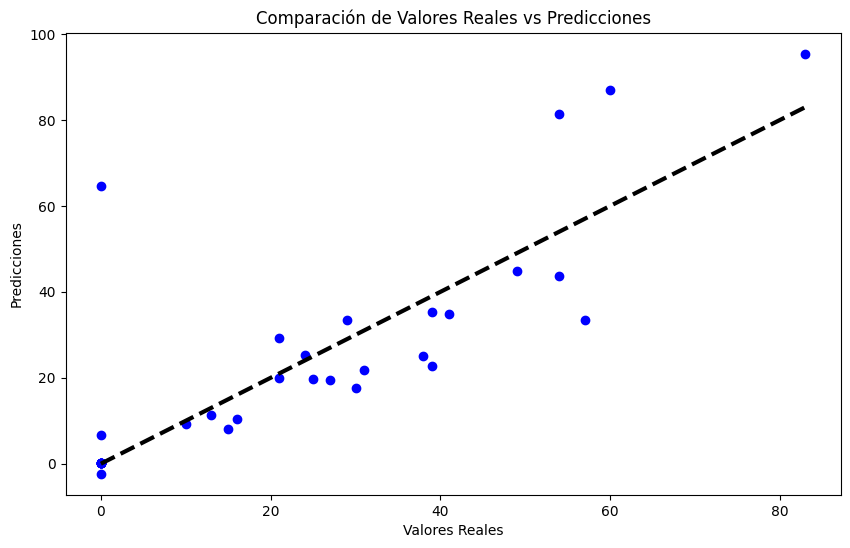

In [58]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

# analisis para el septimo año

In [59]:
# Características y variable objetivo
X = ds[['Matrícula.7', 'No Promovidos.7']]  
y = ds['Promovidos.7']

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)

# Coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto del modelo:", modelo.intercept_)

Error Cuadrático Medio (MSE): 108.04207706885146
Coeficiente de Determinación (R2): 0.43640751313454806
Coeficientes del modelo: [ 0.55900026 -0.28740511]
Intercepto del modelo: -0.019452813683006998


# Analisis de resultados para el septimo año

## Error Cuadrático Medio (MSE): 108.04 = El MSE de 108.04 indica que, en promedio, la diferencia al cuadrado entre los valores observados y los valores predichos es de 108.04. 

## Coeficiente de Determinación (R²): 0.4364 = Un R² de 0.4364 indica que el modelo explica aproximadamente el 43.64% de la variabilidad en la variable dependiente. 

## Coeficientes del Modelo: [0.55900026, -0.28740511] = Coeficiente 1 (0.55900026): Por cada unidad de incremento en Matrícula.1, el valor predicho de Promovidos.7 aumenta en aproximadamente 0.559, manteniendo constante la otra variable.
## Coeficiente 2 (-0.28740511): Por cada unidad de incremento en No Promovidos.7, el valor predicho de Promovidos.7 disminuye en aproximadamente 0.287, manteniendo constante la otra variable. Estos coeficientes indican que Matrícula.7 tiene un impacto positivo significativo en la predicción de Promovidos.7, mientras que No Promovidos.7 tiene un impacto negativo moderado.

## Intercepto del Modelo: -0.019452813683006998 = El intercepto de aproximadamente -0.0195 sugiere que cuando todas las variables independientes son cero, el valor predicho de Promovidos.7 es -0.0195.

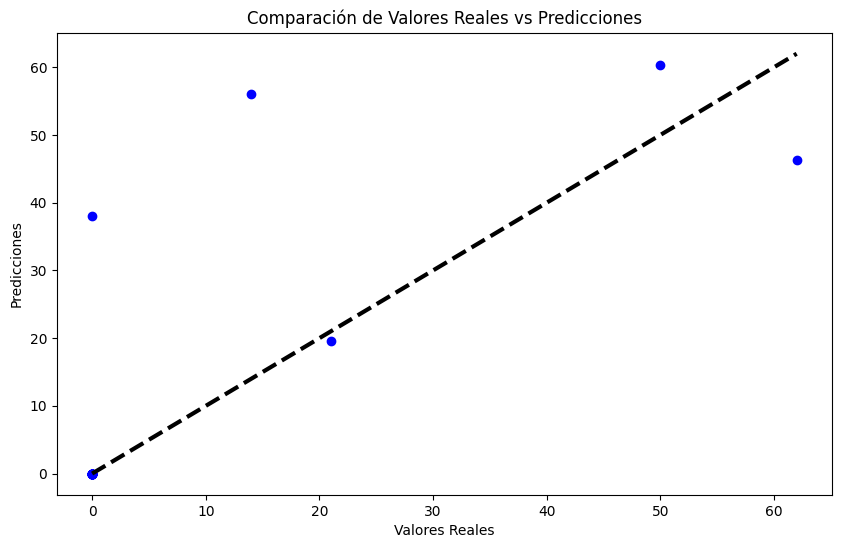

In [60]:
# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones')
plt.show()

## Conclusion del proyecto

## De acuerdo a los datos obtenidos en el presente desarrollo se concluye que...